# Human Trafficking

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fidhdp.com%2Fmedia%2F530418%2Funodc.png&f=1&nofb=1" width="300">

* [United Nations: Office of Drugs & Crime](https://www.unodc.org/unodc/en/human-trafficking/index.html)
    * [Human Trafficking Knowledge Portal](https://sherloc.unodc.org/cld/en/v3/htms/index.html)
    * [Smuggling of Migrants Knowloedge Portal](https://sherloc.unodc.org/cld/en/v3/som/)
    * [Smuggling of Migrants Knowloedge Portal: Tools](https://sherloc.unodc.org/cld/news/index.html?lng=en)
* [Migration Data Portal](https://migrationdataportal.org/themes/human-trafficking)

<img src="https://www.iom.int/sites/default/files/newsdesk/image/mnd09062017-1.jpg" width="300">

* [The Counter Trafficking Data Collaborative](https://www.ctdatacollaborative.org/)
    * [Global Data Hub on Human Trafficking](https://www.ctdatacollaborative.org/download-global-dataset)
        * [The Global Dataset](https://www.ctdatacollaborative.org/dataset/resource/511adcb7-b1a2-4cc7-bf2f-0960d43a49cc)
        * [Global Dataset Codebook](https://www.ctdatacollaborative.org/dataset/resource/5fa66f59-950e-45f9-b3a4-f1d37b7bacda)
        * [Global Dataset Data Dictionary](https://www.ctdatacollaborative.org/dataset/resource/abcc55b1-e6c4-43b4-aec9-9d24d0996be5)
    

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.aneddoticamagazine.com%2Fwp-content%2Fuploads%2FACLED-Armed-Conflict-Location-Event-Data-Project.jpg&f=1&nofb=1" width="100">

* [The Armed Conflict Location & Event Data Project](https://acleddata.com/#/dashboard)

In [7]:
import pandas as pd

#path = 'C:\Users\amyfo\OneDrive\Desktop\Honors Thesis\csv files'
#filename = 'The Global Dataset.csv'

#df = pd.read_csv(path + filename)

df = pd.read_csv(r'C:\Users\amyfo\OneDrive\Desktop\Honors Thesis\csv files\The Global Dataset.csv')
df

,YearOfRegistration,DataSource,Gender,Age Range,MajorityStatus,majorityStatusAtExploit,majorityEntry,Citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48797,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48798,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48799,2019,Case Management,Female,-99,-99,Minor,-99,UG,0,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99


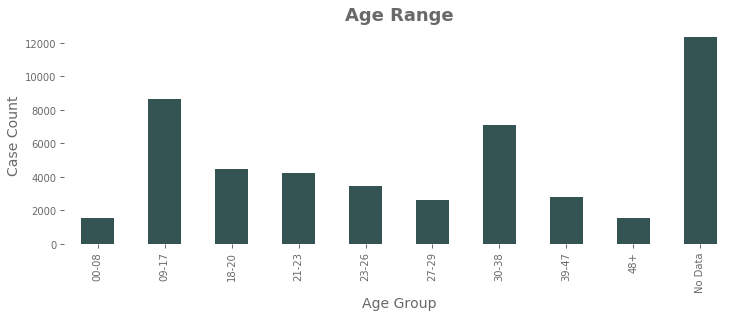

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

def format_plot(ax, font_size, color):
    
    ax.tick_params(direction='out', length = 4, width = 1, colors = color,
                   labelsize = font_size, labelcolor = color)

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    return

background = 'dimgray'
fontsize = 10.0

tag = 'Age Range'
count = Counter(df[tag])

plot_df = pd.DataFrame.from_dict(count, orient = 'index').reset_index()

## Correct the values in the column to be what I want them to be ...
## .... so the order correctly when sorted
corrections = {'18--20': '18-20',
               '21--23': '21-23',
               '24--26': '23-26',
               '27--29': '27-29',
               '30--38': '30-38',
               '9--17': '09-17',
               '-99': 'No Data',
               '0--8': '00-08',
               '39--47': '39-47',
               '48+': '48+'}

plot_df['index'] = plot_df['index'].replace(corrections)

## Sort the dataframe
plot_df.sort_values(by = ['index'], ascending = True, inplace = True)

## Create a matplotlib figure; figsize define the plot size (width,height)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

## Add the dataframe to the matplotlib subplot
plot_df.set_index('index').plot(ax = ax, 
                                kind = 'bar', 
                                color = '#345454',
                                legend = False)

## Adding Title, X-axis, and Y-axis labels
plt.title(tag, fontweight = 'bold', fontsize = 18, color = background)
plt.xlabel('Age Group', fontweight = 'normal', fontsize = 14, color = background)
plt.ylabel('Case Count', fontweight = 'normal', fontsize = 14, color = background)

## Add formatting to the plot; remove borders and subdue plot text
format_plot(ax, fontsize, background)

## Save figure
#plt.savefig('%s.png' % tag, dpi = 300, transparent = True, bbox_inches = 'tight')

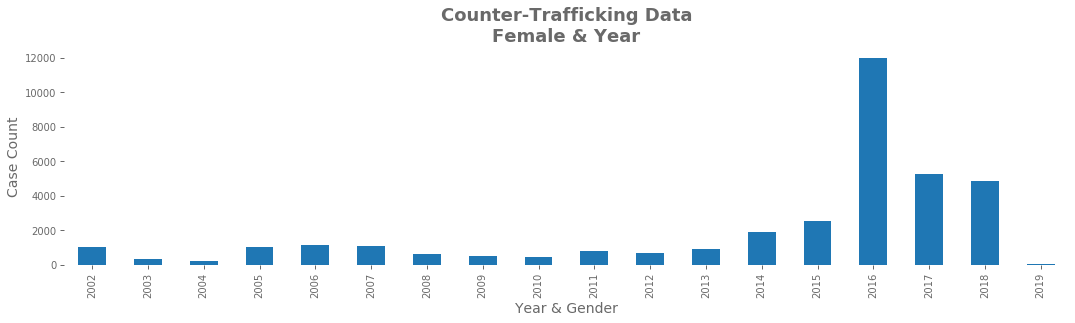

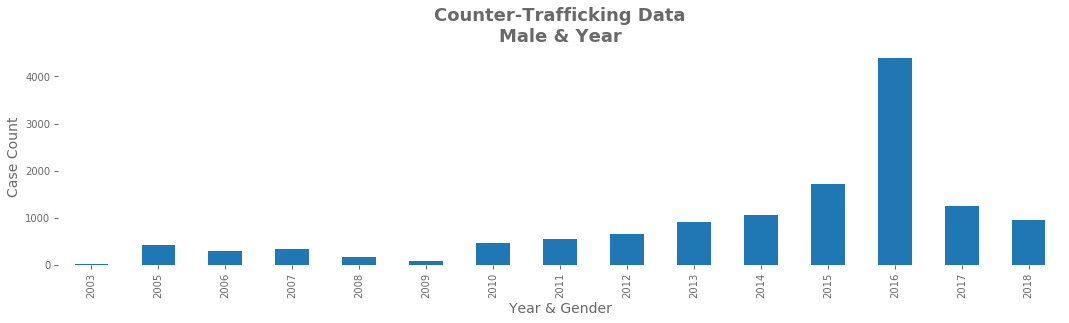

In [15]:
for gender in sorted(df['Gender'].unique()):
    
    ## Create a matplotlib figure; figsize define the plot size (width,height)
    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)

    ## Filter dataset by gender
    filtered = df[df['Gender'] == gender]
    
    ## Group dataframe by column values
    grouped = ['YearOfRegistration']
    filtered.groupby(grouped).count()['DataSource'].plot(ax = ax, kind = 'bar')

    ## Add formatting to the plot; remove borders and subdue plot text
    format_plot(ax, fontsize, background)

    ## Adding Title, X-axis, and Y-axis labels
    plt.title('Counter-Trafficking Data\n%s & Year' % gender, fontweight = 'bold', fontsize = 18, color = background)
    plt.xlabel('Year & Gender', fontweight = 'normal', fontsize = 14, color = background)
    plt.ylabel('Case Count', fontweight = 'normal', fontsize = 14, color = background)

    ## Save figure
    #plt.savefig('%s by Year.png' % gender, dpi = 300, transparent = True, bbox_inches = 'tight')
    
    plt.show()

In [15]:
df[df['gender'] == 'Female'].group

,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,NaN,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48797,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48798,NaN,2019,Case Management,Female,-99,-99,Adult,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99
48799,NaN,2019,Case Management,Female,-99,-99,Minor,-99,UG,0,...,-99,-99,0,-99,UG,-99,-99,-99,-99,-99


In [17]:
corrections = {'18--20': '18-20',
               '21--23': '21-23',
               '24--26': '23-26',
               '27--29': '27-29',
               '30--38': '30-38',
               '9--17': '09-17',
               '-99': 'No Data',
               '0--8': '00-08',
               '39--47': '39-47',
               '48+': '48+'}

plot_df['index'] = plot_df['index'].replace(corrections)

plot_df.sort_values(by = ['index'], ascending = True, inplace = True)

In [21]:
from collections import Counter

Counter(df['MajorityStatus']).most_common(50)

[('Adult', 26238), ('-99', 12362), ('Minor', 10201)]

In [4]:
from collections import Counter

Counter(df['citizenship']).most_common(50)

[('PH', 11365),
 ('00', 8858),
 ('UA', 7761),
 ('MD', 5901),
 ('US', 3636),
 ('KH', 1979),
 ('ID', 1971),
 ('BY', 1463),
 ('MM', 1250),
 ('RO', 655),
 ('GH', 544),
 ('KG', 437),
 ('BG', 342),
 ('HT', 339),
 ('-99', 278),
 ('UZ', 261),
 ('VN', 170),
 ('GW', 145),
 ('LA', 126),
 ('CO', 124),
 ('NG', 108),
 ('UG', 98),
 ('AF', 97),
 ('MG', 94),
 ('LK', 85),
 ('SL', 81),
 ('SN', 70),
 ('TH', 55),
 ('KZ', 54),
 ('CD', 53),
 ('ML', 45),
 ('TJ', 43),
 ('BF', 33),
 ('KE', 32),
 ('CI', 31),
 ('NE', 31),
 ('NP', 27),
 ('TM', 26),
 ('CN', 23),
 ('AL', 22),
 ('MX', 19),
 ('BO', 18),
 ('GN', 15),
 ('ER', 13),
 ('KR', 12),
 ('BD', 11)]